# SIA

##### @author: Anne Hermann

## Overview: 
    Set up variables for the SIA model.
    Create the geometry on an artifical ice sheet and discretize it. 
    Plot the height, velocity and flux over time.
    
    Assumption: the velocity at the base is equal to zero.


In [1]:
import SIA as sia
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from vialov import vialov

In [2]:
# Enable interactive notebook
%matplotlib ipympl

#### Initialize Variables

In [3]:
n = 3           # Glens flow law
rho = 910       # kg m^-3
A = 4.6e-19    # a^-1 Pa^-3 
g = 9.81        # m s^-2

#### Discretization

In [4]:
# grid in x dir.
delta_x = 500
x_lim =25000
x = np.arange(0,x_lim+delta_x,delta_x)

# time 
t_0=0
N=int(1e04)    # Nr. of time steps
delta_t=0.25

#### Initialize the surface elevation, bed, boundary and accumulation rate of the ice sheet

In [5]:
# Acccumulation 
a_s = 0.03 # m/a

# Surface profile and bed
surface =  vialov(x,x_lim,a_s,delta_x,n,A,rho,g)     #-0.001*x**2+20 #5*np.ones(np.size(x)) -0.00005*x**2+4000
bed = x_lim/200*np.sin(10/x_lim*x*np.pi)

# Flux boundary Condition 
boundary = np.array([0,-a_s*x_lim])

#### Plot initial shape and velocity

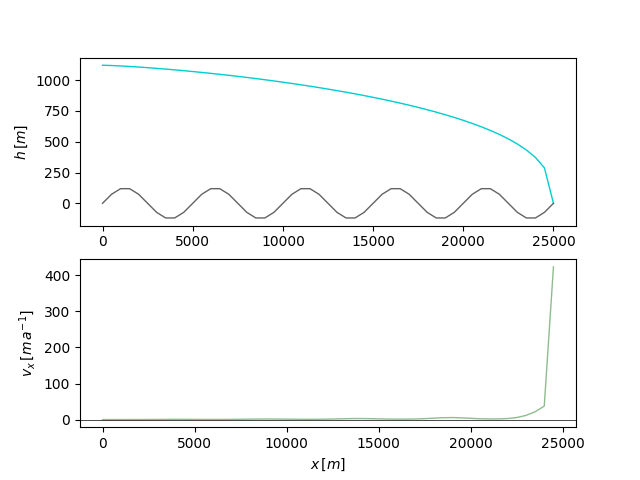

In [6]:
v = sia.velocity(bed, surface, boundary, delta_x, n, rho, A, g)
fig,ax=plt.subplots(2)
ax[0].plot(x,surface,"-",color=(0/255,206/255,209/255),linewidth=1)
ax[0].plot(x,bed,"-",color=(99/255,99/255,99/255),linewidth=1)
ax[0].set(ylabel=r"$h\, [m]$")

ax[1].plot(x[:len(x)-1],v,"-",color=(143/255,188/255,143/255),
                  markerfacecolor=(105/255,139/255,105/255),
                  markeredgecolor=(105/255,139/255,105/255),markersize=2,linewidth=1)
ax[1].set(xlabel=r"$x\,[m]$",ylabel=r"$v_x\,[m\,a^{-1}]$")
ax[1].axhline(y=0, color='k',linewidth=.5)


Velocity calculated with forward difference method: 
$v_0= ... \frac{(h_1-h_0)}{\Delta_x} \cdot h_0$ with $h_0=0$.
This leads to $v_0=0$ and $v_\text{end}$ being large.

#### Calculate the solution with the SIA code

In [7]:
h,v,Q = sia.solution(bed,surface,boundary,a_s,delta_x,delta_t,t_0,N,n,rho,A,g)

#### Create plots

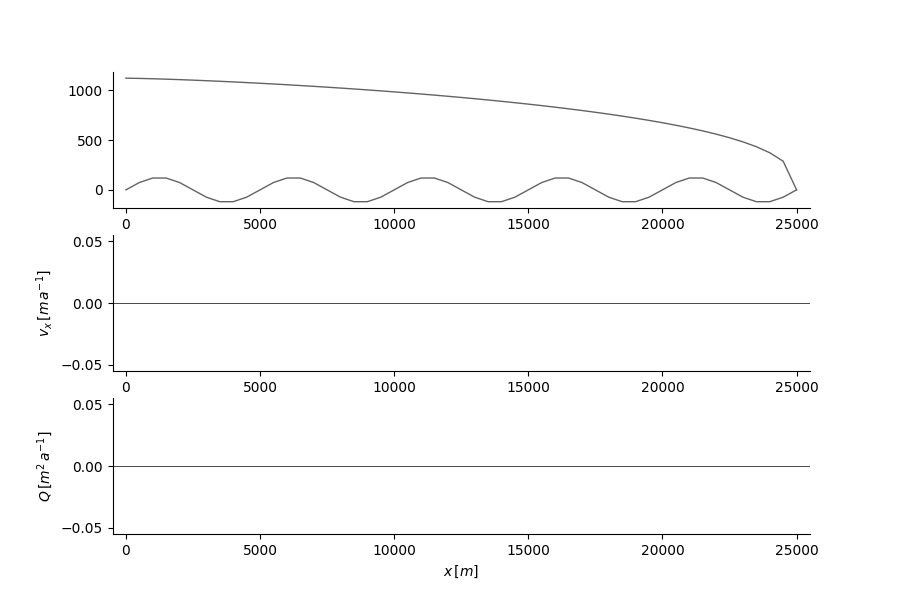

In [8]:
fig,ax=plt.subplots(3,figsize=(9, 6))
ax[0].plot(x,surface,"-",color=(99/255,99/255,99/255),linewidth=1)
ax[0].plot(x,bed,"-",color=(99/255,99/255,99/255),linewidth=1)
line1,=ax[0].plot([],".-",color=(0/255,206/255,209/255),
                  markerfacecolor=(82/255,139/255,139/255),
                  markeredgecolor=(82/255,139/255,139/255),markersize=2, linewidth=.7)
line2,=ax[1].plot([],".-",color=(143/255,188/255,143/255),
                  markerfacecolor=(105/255,139/255,105/255),
                  markeredgecolor=(105/255,139/255,105/255),markersize=2,linewidth=.7)
line3,=ax[2].plot([],".-",color=(238/255,99/255,99/255),
                  markerfacecolor=(139/255,58/255,58/255),
                  markeredgecolor=(139/255,58/255,58/255),markersize=2,linewidth=.7)

ax[0].set_xlim(x[0]-delta_x,x[len(x)-1]+delta_x)
#ax[0].set_ylim(np.min(bed)-0.1,np.max(h)+0.5)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].set_xlim(x[0]-delta_x,x[len(x)-1]+delta_x)
ax[1].set(ylabel=r"$v_x\,[m\,a^{-1}]$")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].axhline(y=0, color='k',linewidth=.5)

ax[2].set_xlim(x[0]-delta_x,x[len(x)-1]+delta_x)
ax[2].set(ylabel=r"$Q\,[m^2\,a^{-1}]$",xlabel=r"$x\,[m]$")
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].axhline(y=0, color='k',linewidth=.5)

def animate_h(frame_num):
    ax[0].set(title = f"Time: {t_0+frame_num*delta_t} [a]",ylabel=r"$h\,[m]$")
    line1.set_data((x,h[frame_num]))
    return line1

def animate_v(frame_num):
    v_min = np.min(v[frame_num])
    v_max = np.max(v[frame_num])
    ax[1].set_ylim([v_min, v_max])
    line2.set_data((x[0:len(x)-1],v[frame_num]))
    return line2

def animate_Q(frame_num):
    Q_min = np.min(Q[frame_num])
    Q_max = np.max(Q[frame_num])
    ax[2].set_ylim([Q_min, Q_max])
    line3.set_data((np.arange(x[0]-delta_x/2,x[len(x)-1]+3/2*delta_x,delta_x),Q[frame_num]))
    return line3

anim1=FuncAnimation(fig,animate_h,frames=range(1,N+1,10),repeat=False,interval=1)
anim2=FuncAnimation(fig,animate_v,frames=range(1,N+1,10),repeat=False,interval=1)
anim3=FuncAnimation(fig,animate_Q,frames=range(1,N+1,10),repeat=False,interval=1)
plt.show()